<a href="https://colab.research.google.com/github/kavyajeetbora/ML_algorithms/blob/master/dimensionality_reduction/01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## Overview
Principal Component Analysis (PCA) is an unsupervised machine learning algorithm used to reduce the dimensionality of a dataset while preserving as much variance as possible.

## Basic Intuition

| Image 1 | Image 2 |
|---------|---------|
| <img src="https://miro.medium.com/v2/resize:fit:750/format:webp/1*-xX-OqEp-Z5G6SESmtc_GQ.png" height="300"/> | <img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*X-tocO_nlFiq3xl7tX4ffg.png" height="300"/> |

Principal Component Analysis (PCA) reduces the number of features in a dataset while retaining the majority of its variance to simplify the model and improve interpretability.

## Benefits
- **Avoiding the Curse of Dimensionality**: Reducing the number of features helps in mitigating overfitting and improving the performance of machine learning models.
- **Visualization**: PCA is useful for visualizing high-dimensional data in 2 or 3 dimensions.

## How PCA Works

1. **Standardization**: Standardize the dataset to have a mean of zero and a standard deviation of one for each feature.

2. **Covariance Matrix**: Compute the covariance matrix to understand how the features vary with respect to each other.

3. **Optimizing Principal Components**:
   - **Sum of Squares**: Draw an arbitrary line in the space and project all data points onto it, then measure the sum of squared distances of these projected points from the center.
   - **Maximization**: Repeat this process to draw the principal component in various orientations to maximize the sum of squared distances of the projected points on the plane.
   - **Principal Components**: After finding the optimal orientation, the principal component is determined. Repeat for different axes (perpendicular ones).

    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*37a_i1t1tDxDYT3ZI6Yn8w.gif" height=300/>

    *Given a 2D dataset, we want to calculate the principal component, which is the line that maximizes the sum of squared distances of the projected points from the origin.*

4. **Eigenvectors and Eigenvalues**:
   - **Eigenvectors (Principal Components)**: These are the directions in which the data varies the most.
   - **Eigenvalues**: These represent the magnitude of variance in the direction of their corresponding eigenvectors.

5. **Selecting Principal Components**:
   - **Variance Explanation**: Choose the top \(k\) principal components that explain the most variance. For example, if the eigenvalues are \(70\%, 20\%, 7\%, 3\%\), the first two principal components explain \(90\%\) of the variance.
   - **Projection**: Project the original data onto the selected principal components to obtain the reduced-dimensional dataset.

## Clarifications

- **Eigenvectors Calculation**: Eigenvectors are not calculated for each data point separately. They are derived from the covariance matrix of the entire dataset.
- **Eigenvalues**: These are not the average of the sum of squares of distances but rather the variances explained by the principal components.

## Example Scenario

- **Eigenvalues Composition**: If the eigenvalues are \(70\%, 20\%, 7\%, 3\%\), the first principal component explains \(70\%\) of the variance, and the second explains \(20\%\). Using the first two principal components would explain \(90\%\) of the total variance, making it a good approximation.

- **Equal Distribution**: If the eigenvalues are evenly distributed, it suggests that all features contribute equally to the variance, and dimensionality reduction might not be as effective.

## Summary
Principal Component Analysis (PCA) reduces the number of features in a dataset while retaining the majority of its variance by optimizing the sum of squared distances of data points projected onto principal components, simplifying the model and improving interpretability.

## References

1. [StatQuest video on PCA](https://youtu.be/FgakZw6K1QQ?si=HlSDBP9WeSo0m60g)
2. [Visuals of PCA taken from this article](https://hrithickcodes.medium.com/understanding-principle-component-analysis-pca-from-scratch-db7ceda623eb)

## Application of PCA

- In this example we will see how we can compress the data into less features and achieve same level of accuracy when training each dataset for a classification task

Image data compression using PCA

In [44]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
dataset.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

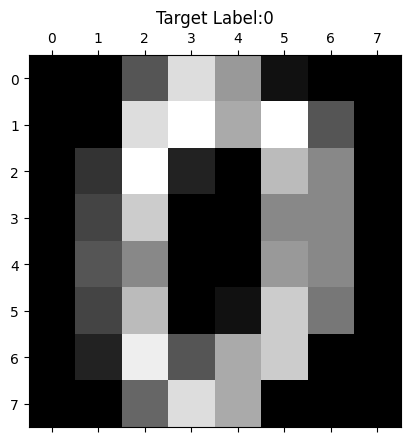

In [21]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))
plt.title(f"Target Label:{dataset.target[0]}")
plt.show()

## Creating the training dataset

In [23]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
314,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,2.0,13.0,16.0,14.0,4.0,0.0
814,0.0,0.0,2.0,12.0,14.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,12.0,16.0,11.0,0.0,0.0
1704,0.0,0.0,12.0,16.0,14.0,8.0,0.0,0.0,0.0,7.0,...,1.0,0.0,0.0,1.0,9.0,16.0,14.0,3.0,0.0,0.0


## Splitting the dataset into train and test

In [33]:
y = dataset.target
print(y.shape)

(1797,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


### Scaling the features

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling

In [43]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.9722222222222222

## Dataset Compression using PCA

- For initializing we can give `n_components` or

- we can give the `n_components` in percentage value that means that we are saying PCA model to retain features that explains 95% of the dataset

In [47]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)
print(df_pca.shape)

(1797, 29)


We can see that from the original dataset which was having 64 features, now we have 29 features only after compressing using PCA

In [67]:
print(f"Reduction of {(df.shape[1] - df_pca.shape[1])/df.shape[1]*100:.2f} % features")

Reduction of 54.69 % features


In [54]:
print("Printing the first 5 rows and first 5 columns")
print(df_pca[0:5,:5])

Printing the first 5 rows and first 5 columns
[[ -1.25946645 -21.27488348   9.46305462 -13.01418869   7.12882278]
 [  7.9576113   20.76869896  -4.43950604  14.89366444  -5.89624878]
 [  6.99192297   9.95598641  -2.95855808  12.28830243  18.1260233 ]
 [-15.90610526  -3.33246429  -9.82437176  12.27583834  -6.96516946]
 [ 23.30686741  -4.26906083   5.67512857  13.85152412   0.35812369]]


## Split the dataset

In [57]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

### Scaling the features

In [60]:
scaler = StandardScaler()

X_train_scaled_pca = scaler.fit_transform(X_train_pca)
X_test_scaled_pca = scaler.transform(X_test_pca)

## Modelling and Evaluating

In [61]:
model = LogisticRegression()
model.fit(X_train_scaled_pca, y_train)
model.score(X_test_scaled_pca, y_test)

0.9666666666666667

So after removing 54% data, we are having almost the same accuracy.

## Conclusion

PCA helps in data compression by reducing the number of features while retaining the most important information. For image compression, PCA transforms the image data into a smaller set of principal components, making it more efficient to store and faster to train CNN models. This reduces computational cost and helps prevent overfitting.


## Applications of Principal Component Analysis (PCA)

1. **Image Compression**: PCA reduces the dimensionality of image data, making it easier to store and process, which is particularly useful for training machine learning models like CNNs.

2. **Facial Recognition**: PCA is used to identify and extract key features from facial images, improving the accuracy and efficiency of facial recognition systems.

3. **Neuroscience**: PCA helps in analyzing neural data by identifying patterns and reducing the complexity of large datasets, such as in spike-triggered covariance analysis.

4. **Quantitative Finance**: PCA is used to reduce the dimensionality of financial data, making it easier to analyze and model complex financial systems.

5. **Medical Data Analysis**: PCA assists in correlating and interpreting large medical datasets, helping in the identification of significant patterns and trends.

6. **Simplifying Complex Datasets**: PCA transforms high-dimensional data into a lower-dimensional form, simplifying the dataset while retaining the most important information. This makes it easier to work with and analyze.

7. **Data Visualization**: By reducing the number of dimensions, PCA allows for better visualization of data in 2D or 3D plots, making it easier to interpret and understand the underlying patterns and relationships.